# Clusterización para la cartera de clientes de una compañía de telecomunicaciones

Primero utilizaremos este comando para importar la base que se encuentra alojado en el drive del grupo.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Primero visualizaremos la data completa y sus respectivas columnas.
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/Base_Triple_comas.csv', encoding='latin-1')
df

,PRODUCTOS,GÉNERO,GSE,Profesión,SUBZONA,ZONA,TIPO_CONSTRUCCIÓN,EDAD,EDAD_INT,Reclamos_INT,Antigüedad_INT,Facturación,Reclama
0,CFI,M,D,PENDIENTE,SANTIAGO SUR,SANTIAGO CENTRO,HORIZONTAL,33.0,30 - 44,6 o más,Más de 10 años,40000 o más,1
1,CFI,M,C3,NO INFORMA,SANTIAGO SUR,SANTIAGO CENTRO,HORIZONTAL,51.0,45 - 54,1,4 - 5 años,40000 o más,1
2,CFI,F,C3,EMPLEADO,SANTIAGO SUR,SANTIAGO CENTRO,HORIZONTAL,22.0,18 - 29,0,2 - 3 años,40000 o más,0
3,CFI,M,C2,EMPLEADO,SANTIAGO SUR,SANTIAGO CENTRO,HORIZONTAL,34.0,30 - 44,0,5 - 10 años,40000 o más,0
4,CFI,F,D,DUEñA DE CASA,SANTIAGO SUR,SANTIAGO CENTRO,HORIZONTAL,44.0,30 - 44,0,5 - 10 años,30000 - 40000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499852,CFI,M,NULO,NO TIENE,RANCAGUA,ZONA CENTRO,HORIZONTAL,53.0,45 - 54,0,Menos de 3 meses,SD,0
499853,CFI,F,NULO,NO TIENE,VALPARAISO,ZONA CENTRO,HORIZONTAL,54.0,45 - 54,0,Menos de 3 meses,SD,0
499854,CFI,M,NULO,NO TIENE,VINA DEL MAR,ZONA CENTRO,HORIZONTAL,39.0,30 - 44,0,Menos de 3 meses,SD,0
499855,CFI,F,NULO,OTRO,VALPARAISO,ZONA CENTRO,HORIZONTAL,67.0,65 o más,0,Menos de 3 meses,SD,0


## Exploratory and Data Analysis

Se necesita hacer un pequeño análisis exploratorio para entender el tipo de variables y la frecuencia de cada de una de las variables categóricas. Esto con el fin de tener un entendimiento aproximado de la data que se está analizando.
A continuación un resumen de las variables y su respectivo tipo.  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499857 entries, 0 to 499856
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   PRODUCTOS          499857 non-null  object 
 1   GÉNERO             499855 non-null  object 
 2   GSE                499855 non-null  object 
 3   Profesión          499855 non-null  object 
 4   SUBZONA            499855 non-null  object 
 5   ZONA               499855 non-null  object 
 6   TIPO_CONSTRUCCIÓN  499855 non-null  object 
 7   EDAD               498173 non-null  float64
 8   EDAD_INT           498173 non-null  object 
 9   Reclamos_INT       499857 non-null  object 
 10  Antigüedad_INT     499857 non-null  object 
 11  Facturación        499857 non-null  object 
 12  Reclama            499857 non-null  int64  
dtypes: float64(1), int64(1), object(11)
memory usage: 49.6+ MB


In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,499817,499818,499819,499820,499821,499822,499823,499824,499825,499826,499827,499828,499829,499830,499831,499832,499833,499834,499835,499836,499837,499838,499839,499840,499841,499842,499843,499844,499845,499846,499847,499848,499849,499850,499851,499852,499853,499854,499855,499856
PRODUCTOS,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,...,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI,CFI
GÉNERO,M,M,F,M,F,M,M,M,F,M,M,F,M,F,M,M,M,M,F,F,F,M,M,F,F,F,M,M,F,M,M,M,F,M,F,F,F,F,F,M,...,M,M,M,M,F,M,M,F,F,M,F,F,F,M,F,F,M,M,F,F,F,F,M,F,M,F,F,F,M,M,F,M,F,F,F,M,F,M,F,F
GSE,D,C3,C3,C2,D,ABC1,D,C3,C2,D,C3,D,C2,C2,D,D,C3,ABC1,C2,C3,D,D,C3,C3,C3,C3,C2,C3,D,C3,C2,C2,ABC1,D,C2,C2,C3,C2,E,C3,...,NULO,NULO,NULO,NULO,NULO,NULO,C3,NULO,NULO,NULO,NULO,NULO,NULO,NULO,C3,NULO,NULO,C3,C2,C3,NULO,NULO,NULO,NULO,NULO,NULO,C3,NULO,D,NULO,D,NULO,D,NULO,NULO,NULO,NULO,NULO,NULO,NULO
Profesión,PENDIENTE,NO INFORMA,EMPLEADO,EMPLEADO,DUEñA DE CASA,COMERCIANTE,VENDEDOR,CONTADOR,DUEñA DE CASA,EMPLEADO,EMPLEADO,JUBILADO,EMPLEADO,EMPLEADO,NO TIENE,EMPLEADO,EMPLEADO,EMPLEADO,DUE¿A DE CASA,PROFESOR,OTRO,NO INFORMA,OTRO,DUE¿A DE CASA,DUE¿A DE CASA,DUE¿A DE CASA,MEDICO,NO INFORMA,EMPLEADO,TéCNICO,INDEPENDIENTE,NO TIENE,DUE¿A DE CASA,EMPLEADO,PROFESOR,EMPLEADO,EMPLEADO,OTRO,DUE¿A DE CASA,T¿CNICO,...,NO INFORMA,OTRO,CONTADOR,NO TIENE,NO TIENE,EMPLEADO,OTRO,NO INFORMA,NO INFORMA,NO TIENE,DUEñA DE CASA,NO TIENE,OTRO,NO TIENE,EMPLEADO,NO TIENE,NO INFORMA,NO TIENE,NO TIENE,OTRO,OTRO,OTRO,NO TIENE,OTRO,NO INFORMA,NO TIENE,OTRO,NO TIENE,NO TIENE,EMPLEADO,NO TIENE,NO TIENE,NO TIENE,NO TIENE,DUEñA DE CASA,NO TIENE,NO TIENE,NO TIENE,OTRO,NO TIENE
SUBZONA,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,SANTIAGO SUR,...,QUILLOTA,QUILLOTA,VINA DEL MAR,VALPARAISO,SANTIAGO ORIENTE,TALCA,CONCEPCION,SANTIAGO NOR-PONIENTE,SANTIAGO NOR-PONIENTE,VINA DEL MAR,VINA DEL MAR,VALDIVIA,VALDIVIA,SAN ANTONIO,ARICA,VINA DEL MAR,VINA DEL MAR,SANTIAGO SUR,SANTIAGO SUR,CONCEPCION,CONCEPCION,SANTIAGO NOR-PONIENTE,QUILLOTA,VINA DEL MAR,COQUIMBO,SANTIAGO SUR,OSORNO,ANTOFAGASTA,SANTIAGO SUR,VINA DEL MAR,VILLA ALEMANA,VALDIVIA,VINA DEL MAR,VALDIVIA,VALDIVIA,RANCAGUA,VALPARAISO,VINA DEL MAR,VALPARAISO,VALPARAISO
ZONA,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,SANTIAGO CENTRO,...,ZONA CENTRO,ZONA CENTRO,ZONA CENTRO,ZONA CENTRO,SANTIAGO CENTRO,ZONA SUR,ZONA SUR,SANTIAGO NORTE,SANTIAGO NORTE,ZONA CENTRO,ZONA CENTRO,ZONA SUR,ZONA SUR,ZONA CENTRO,ZONA NORTE,ZONA CENTRO,ZONA CENTRO,SANTIAGO SUR,SANTIAGO SUR,ZONA SUR,ZONA SUR,SANTIAGO NORTE,ZONA CENTRO,ZONA CENTRO,ZONA NORTE,SANTIAGO CENTRO,ZONA SUR,ZONA NORTE,SANTIAGO SUR,ZONA CENTRO,ZONA CENTRO,ZONA SUR,ZONA CEN

## Visualización

Primero se hará una visualización de todas las variables para mirar los datos faltantes y los valores que tengan valores nulos.  

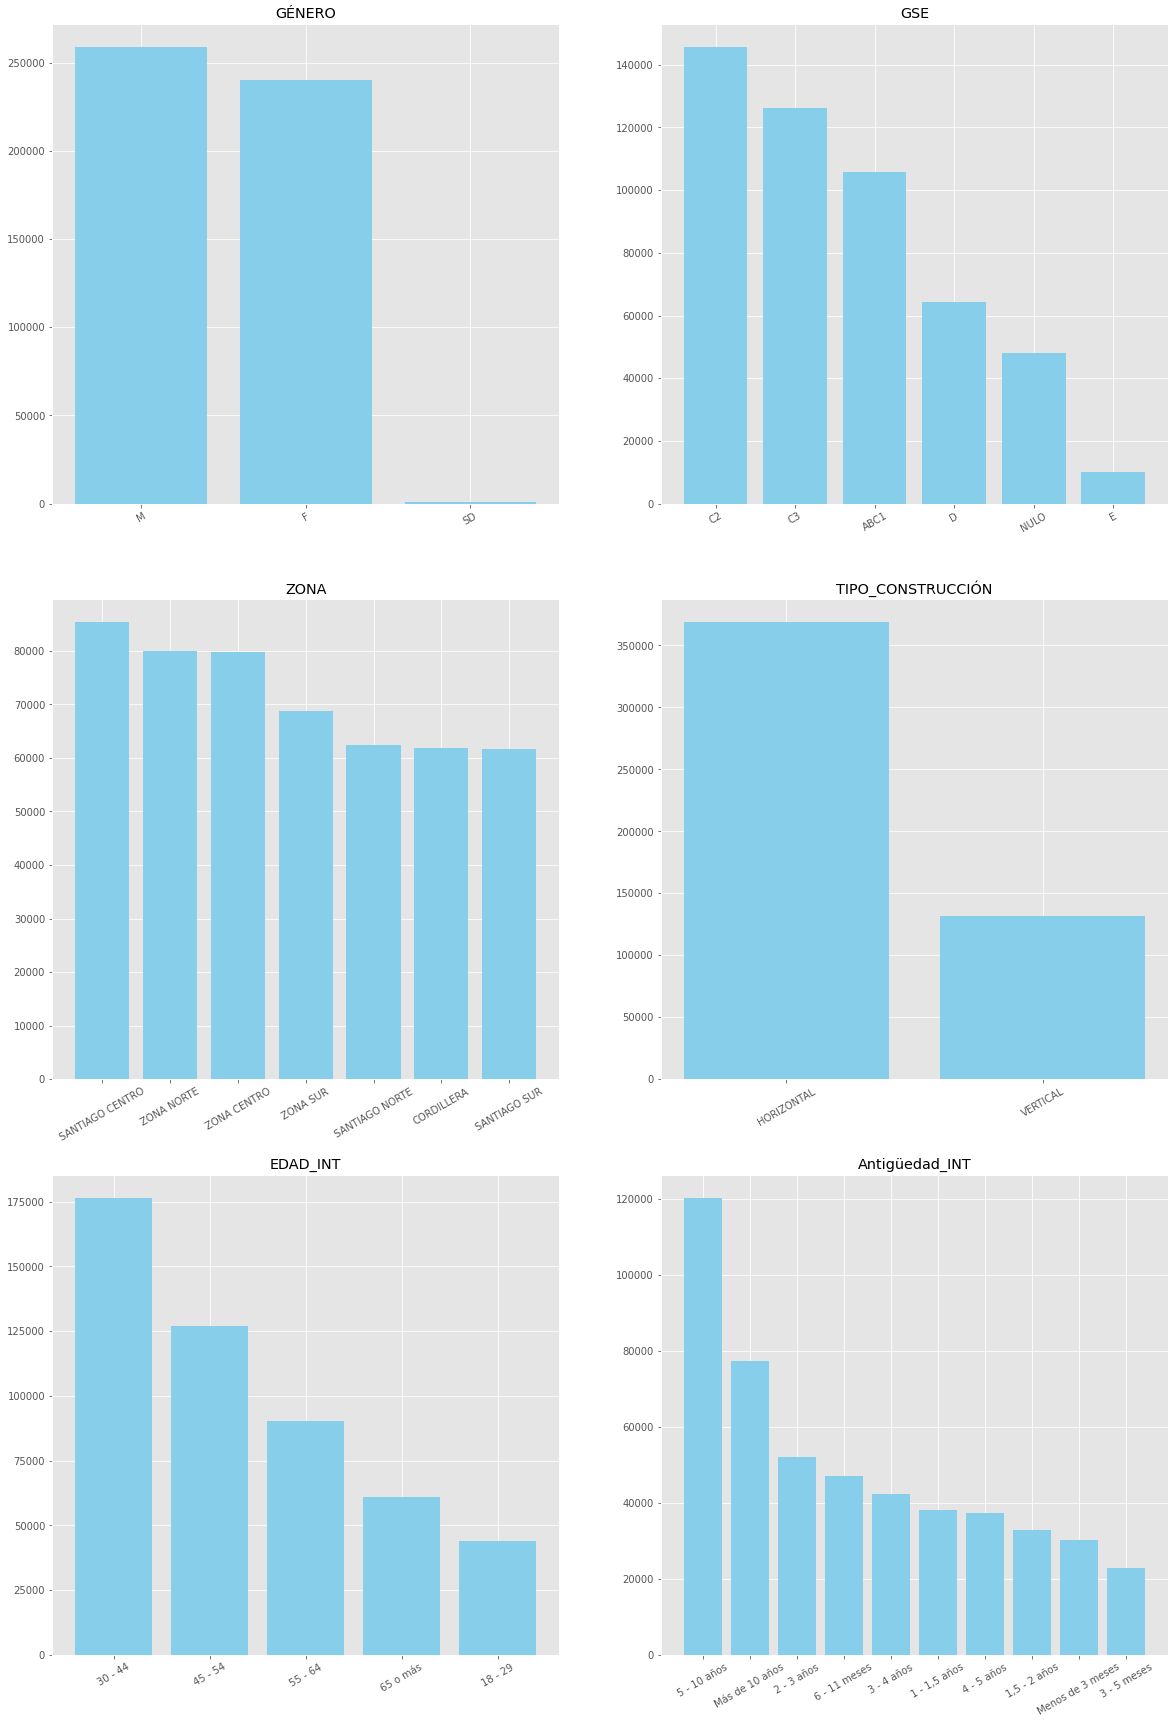

"\n\n\nfor col, ax in zip(cols_to_plot, axs.flatten()):\n    dftemp = df[col].value_counts()\n    ax.bar(dftemp.index, list(dftemp))\n    ax.set_title(col)\n    ax.tick_params(axis='x', labelrotation=30)\n\nplt.show()\n"

In [ ]:
############ Gráficos ####################

import matplotlib.pyplot as plt

# Se eliminan columnas que no tienen que ver con el análisis y se crea una copia de la base.
df_def = df.copy()
df_def = df_def.drop(columns=['PRODUCTOS', 'SUBZONA','Profesión','Reclamos_INT', 'Reclama', 'EDAD', 'Facturación'])


plt.style.use('ggplot')
figure, axis=plt.subplots(3,2,figsize=(20,30))
# x = [x for x in range(0,len(df.columns))]
for i, ax in zip(df_def.columns, axis.flatten()):
  
  ax.set_title(f'{i}')
  ax.bar(df_def[i].value_counts().index, height=df_def[i].value_counts().tolist(), color=['skyblue'])
  ax.tick_params(axis='x', labelrotation=30)

plt.show();

In [ ]:
df_def['GÉNERO'].value_counts()

M     258971
F     239890
SD       994
Name: GÉNERO, dtype: int64

## Eliminación de valores faltantes

Del gráfico nos podemos dar cuenta que existen valores con acrónimo "SD", el cual hace referencia a "sin dato". Por lo tanto, se seguirá explorando la cantidad de estos valores para evaluar la posibilidad de eliminarlos del ánalisis si es que estos no representan una parte importante de la data original. (499.857 observaciones)

In [ ]:
# Cambiando los valores de SD con NaN para estandarizar los valores faltantes.

df_def['GÉNERO'] = df_def['GÉNERO'].replace({'SD':'NaN'})
df_def['GÉNERO'].value_counts()
df_def = df_def[df_def['GÉNERO'] != 'NaN']
df_def['GÉNERO'].value_counts()

M    258971
F    239890
Name: GÉNERO, dtype: int64

In [ ]:
# La tabla con el número de observaciones con NaN da un total de 1694, lo cual representa un 0.3% de la data. Por lo tanto se eliminarán estos valores y se dejará un tratamiento especial para la columna GSE. 

df_def.isnull().sum()

GÉNERO                  2
GSE                     2
ZONA                    2
TIPO_CONSTRUCCIÓN       2
EDAD_INT             1107
Antigüedad_INT          0
dtype: int64

In [ ]:
#df_def.dropna(how='all', axis=0, inplace = True)
df_def['GSE'].value_counts()

C2      145482
C3      125891
ABC1    105430
D        64157
NULO     47980
E         9921
Name: GSE, dtype: int64

In [ ]:
# Se eliminaron los valores faltantes con valor igual a NaN.

df_def.dropna(axis='rows', how='any', inplace=True)
df_def.isnull().sum()

GÉNERO               0
GSE                  0
ZONA                 0
TIPO_CONSTRUCCIÓN    0
EDAD_INT             0
Antigüedad_INT       0
dtype: int64

In [ ]:
# Reemplazando los valores NULOS con la moda del dataset. 
df_def['GSE'] = df_def['GSE'].replace({'NULO':'C2'})
df_def['GSE'].value_counts()



C2      193070
C3      125630
ABC1    105105
D        64047
E         9902
Name: GSE, dtype: int64

In [ ]:
df_def.GSE.value_counts()

C2      193070
C3      125630
ABC1    105105
D        64047
E         9902
Name: GSE, dtype: int64

# Estrategias y desarrollo: 

Es importante mencionar que nuestra data es solo categórica. Por lo tanto, existen una serie de estrategias/algoritmos que se puede utilizar para este problema:

1. Utilizar el algoritmo K-Modes: **Se intentó utilizar este algoritmo, pero fue demasiado costoso computacionalmente que se reinició la memoria del notebook.**
2. Utilizar algoritmos jerárquicos donde se puede calcular la matriz de distancia con alguna métrica específica que nos ayude. (Para este caso se utiliza la métrica 'dice' o 'jaccard' - http://www.jds-online.com/files/JDS-192.pdf. **Se intentó utilizar esta metodología , pero al tener una cantidad de 500.000 datos aproximadamente el computador no fue capaz de calcular la matriz de distancia.**
3. Una tercera metodología fue hacer label encoding, hacer PCA, encontrar las componentes que mejor explican la data total , encontrar el K de cluster y entrenar un K-means. **Esto se probó y se analizaron los resultados. Aún cuando esta metodología no es tan recomendable por el label encoding para las variables, se probó con resultados malos para los clusters encontrados.**
4. Una cuarta metodología y final fue hacer one hot encoding, hacer PCA, encontrar las componentes que mejor explican la data total , encontrar el K de cluster y entrenar un K-means. **Esta fue la mejor metodología para encontrar los clusters.**

> Para este problema se utilizaron las estrategias 3 y 4. 

# Primer experimento: Label Encoding - Kmeans

## Label encoding para la data original

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_def_label = df_def.apply(le.fit_transform)
df_def_label.head()

,GÉNERO,GSE,ZONA,TIPO_CONSTRUCCIÓN,EDAD_INT,Antigüedad_INT
0,1,3,1,0,1,9
1,1,2,1,0,2,5
2,0,2,1,0,0,2
3,1,1,1,0,1,6
4,0,3,1,0,1,6


## Implementando PCA

In [ ]:
# Creando la instancia para el PCA
pca = PCA()
pca.fit(df_def_label)
pca.explained_variance_ratio_.shape

(6,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


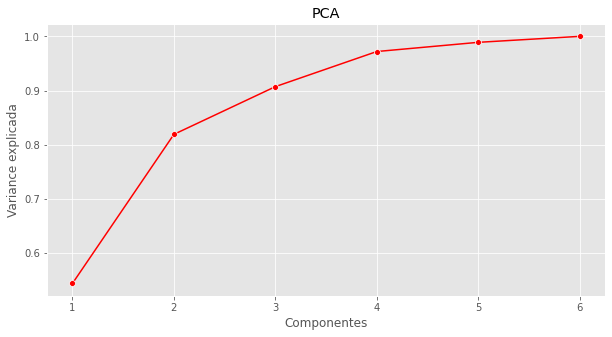

In [ ]:
# Graficando las componentes principales versus el porcentaje de explicancia de la varianza
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 7), pca.explained_variance_ratio_.cumsum(),marker='o',color='red')
plt.title('PCA')
plt.xlabel('Componentes')
plt.ylabel('Variance explicada')
plt.show()

In [ ]:
# Luego del gráfico tomamos las primeras 2 componentes principales.
pca = PCA(n_components=2)
pca.fit(df_def_label)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# Matriz de PCA
scores_pca = pca.transform(df_def_label)

## Encontrando el valor del K mediante el método del codo

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
  kmeans_label = KMeans(n_clusters=i, init = 'k-means++', random_state = 42)
  kmeans_label.fit(scores_pca)
  wcss.append(kmeans_label.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


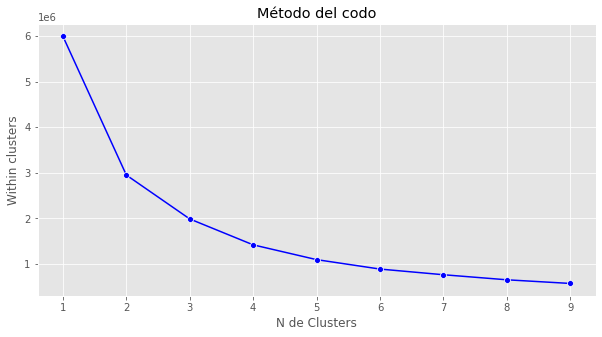

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 10), wcss ,marker='o',color='blue')
plt.title('Método del codo')
plt.xlabel('N de Clusters')
plt.ylabel('Within clusters')
plt.show();

In [ ]:
# Se seleccionaron 4 clusters.

k_means_label = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
k_means_label.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
# Se agrega la columna clusters con las etiquetas encontradas por el algoritmo. 
lista = [f'Component_{x}' for x in range(1,3)]

df_add_label = pd.concat([df_def.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)

df_add_label.columns.values[-2: ] = lista
df_add_label['Clusters'] = k_means_label.labels_


,GÉNERO,GSE,ZONA,TIPO_CONSTRUCCIÓN,EDAD_INT,Antigüedad_INT,Component_1,Component_2,Clusters
0,M,D,SANTIAGO CENTRO,HORIZONTAL,30 - 44,Más de 10 años,-3.759109,-1.785637,2
1,M,C3,SANTIAGO CENTRO,HORIZONTAL,45 - 54,4 - 5 años,0.083621,-1.917089,2
2,F,C3,SANTIAGO CENTRO,HORIZONTAL,18 - 29,2 - 3 años,3.295879,-1.819723,0
3,M,C2,SANTIAGO CENTRO,HORIZONTAL,30 - 44,5 - 10 años,-0.813659,-2.037088,2
4,F,D,SANTIAGO CENTRO,HORIZONTAL,30 - 44,5 - 10 años,-0.772846,-1.755000,2


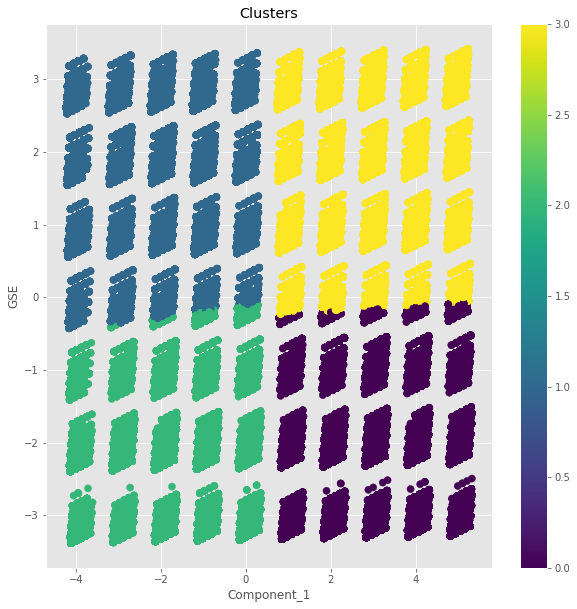

In [ ]:
#Ploteando los clusters con las 2 primeras componentes principales.
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(df_add_label['Component_1'],df_add_label['Component_2'],
                     c=df_add_label['Clusters'],s=50)
ax.set_title('Clusters')
ax.set_xlabel('Component_1')
ax.set_ylabel('GSE')
plt.colorbar(scatter)

## Conclusión

A pesar de que se ve bien en la gráfica aunque demasiado ordenado debemos revisar los grupos que creo el algoritmo.

## Cluster 1

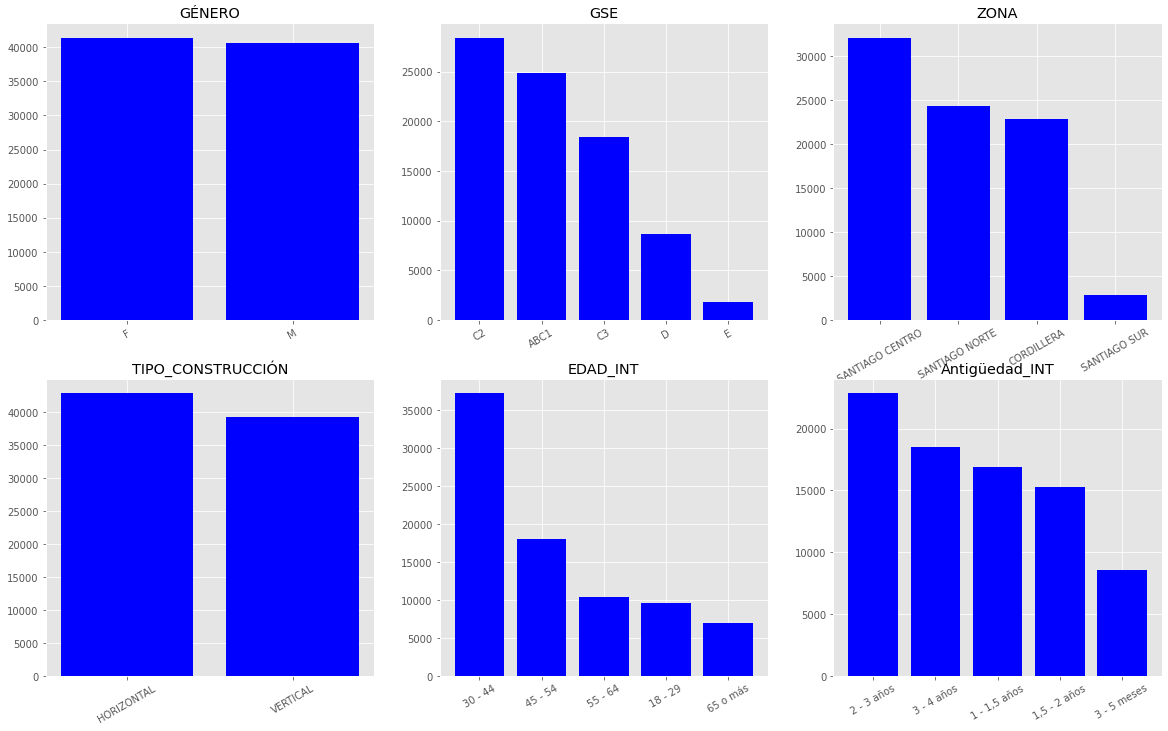

In [ ]:
plt.style.use('ggplot')
figure, axis=plt.subplots(2,3,figsize=(20,12))
# x = [x for x in range(0,len(df.columns))]
for i, ax in zip(df_add_label.columns, axis.flatten()):
  ax.set_title(f'{i}')
  ax.bar(df_add_label[df_add_label['Clusters'] == 0][i].value_counts().index, height=df_add_label[df_add_label['Clusters'] == 0][i].value_counts().tolist(), color=['blue'])
  ax.tick_params(axis='x', labelrotation=30)
plt.show();

## Cluster 2

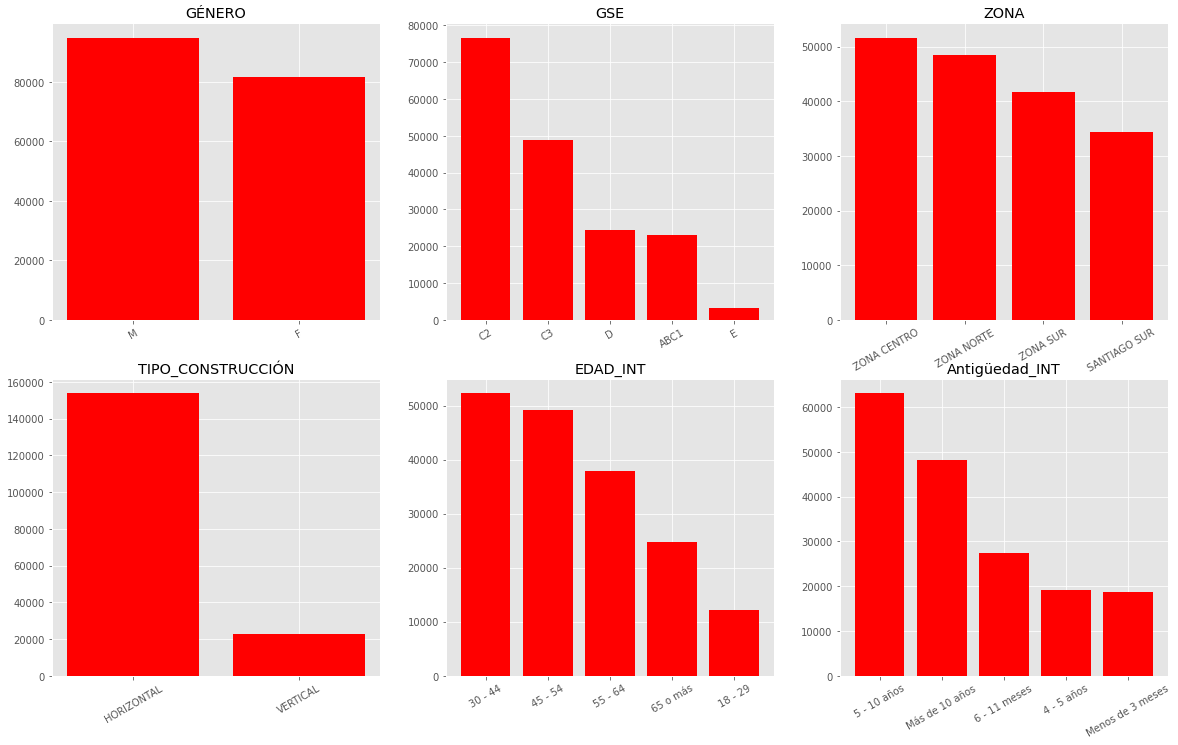

In [ ]:
plt.style.use('ggplot')
figure, axis=plt.subplots(2,3,figsize=(20,12))
# x = [x for x in range(0,len(df.columns))]
for i, ax in zip(df_add_label.columns, axis.flatten()):
  ax.set_title(f'{i}')
  ax.bar(df_add_label[df_add_label['Clusters'] == 1][i].value_counts().index, height=df_add_label[df_add_label['Clusters'] == 1][i].value_counts().tolist(), color=['red'])
  ax.tick_params(axis='x', labelrotation=30)
plt.show();

## Cluster 3

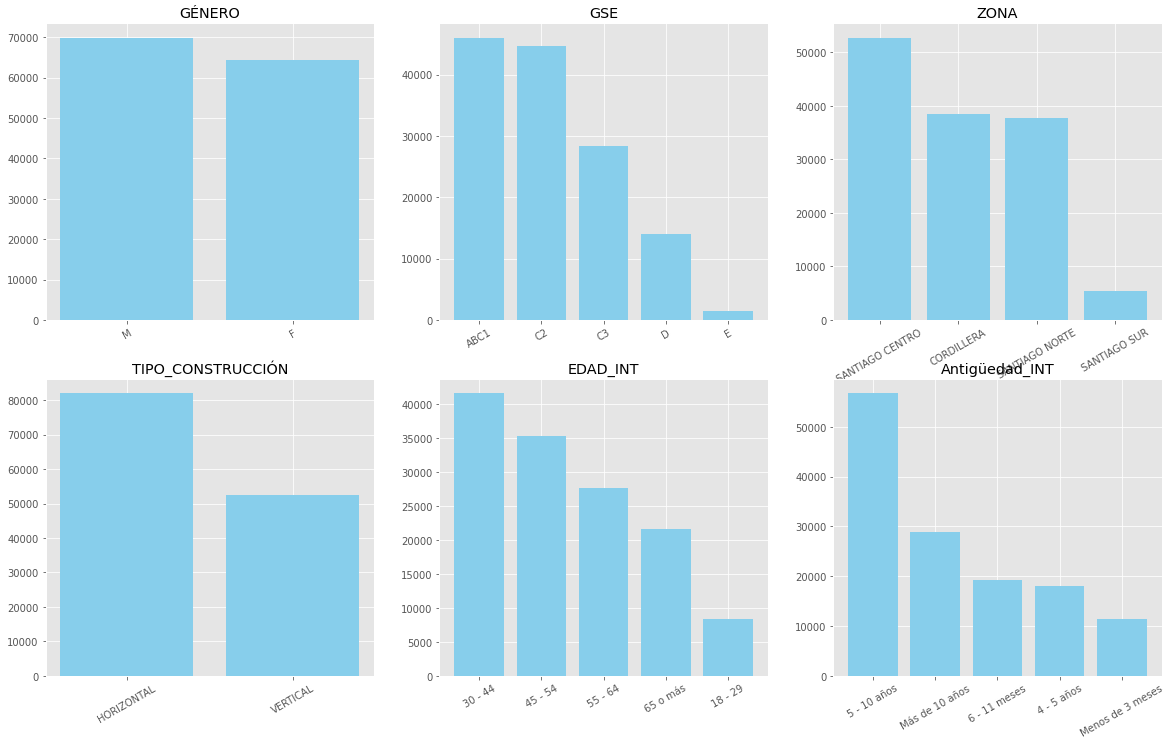

In [ ]:
plt.style.use('ggplot')
figure, axis=plt.subplots(2,3,figsize=(20,12))
# x = [x for x in range(0,len(df.columns))]
for i, ax in zip(df_add_label.columns, axis.flatten()):
  ax.set_title(f'{i}')
  ax.bar(df_add_label[df_add_label['Clusters'] == 2][i].value_counts().index, height=df_add_label[df_add_label['Clusters'] == 2][i].value_counts().tolist(), color=['skyblue'])
  ax.tick_params(axis='x', labelrotation=30)
plt.show();

## Cluster 4

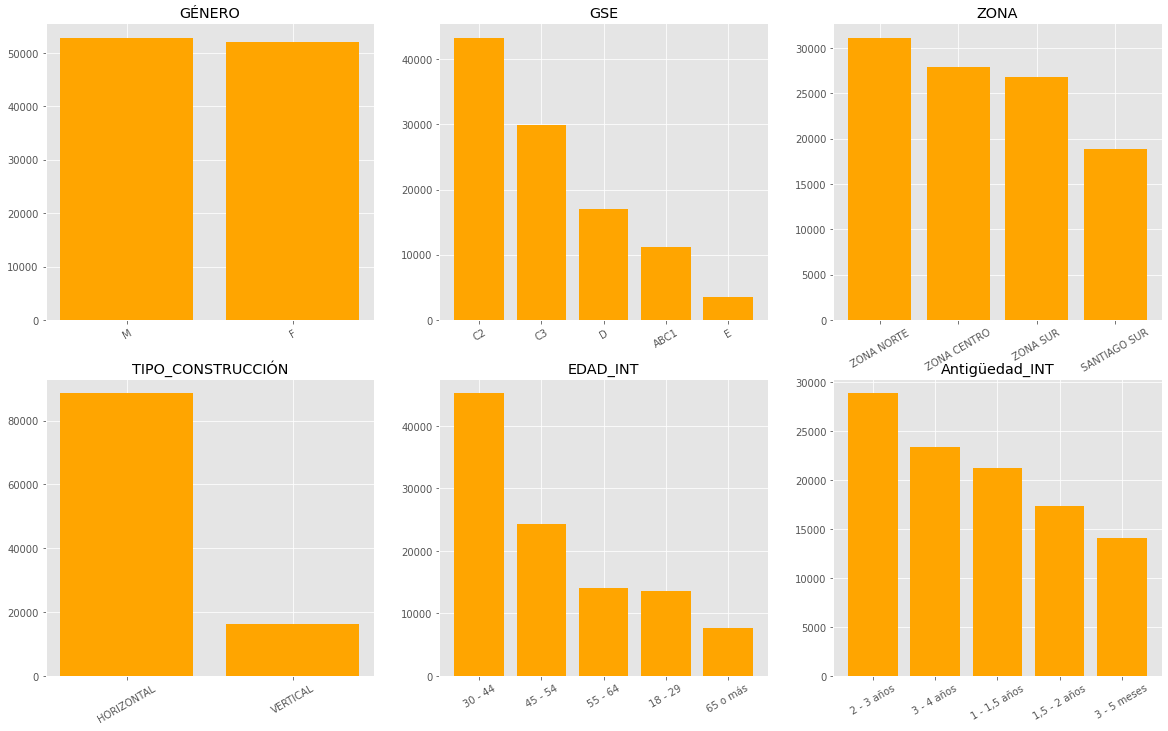

In [ ]:
plt.style.use('ggplot')
figure, axis=plt.subplots(2,3,figsize=(20,12))
# x = [x for x in range(0,len(df.columns))]
for i, ax in zip(df_add_label.columns, axis.flatten()):
  ax.set_title(f'{i}')
  ax.bar(df_add_label[df_add_label['Clusters'] == 3][i].value_counts().index, height=df_add_label[df_add_label['Clusters'] == 3][i].value_counts().tolist(), color=['orange'])
  ax.tick_params(axis='x', labelrotation=30)
plt.show();

## Conclusiones de label encoding

1) Gráficamente se distinguen los clusters de buena manera. 

2) Si analizamos los resultados todos los clusters tienen las mismas distribuciones. Es decir, que no nos sirve puesto que debemos distinguir características de clientes por sobre otros. 

En conclusión se intentará la segunda metodología que consiste en hacer one hot encoding, PCA y kmeans. 

# Segundo experimento: One hot encoding, PCA y k means

## One hot encoding

In [ ]:
# Transformando la data a binaria.
df_binary = pd.get_dummies(df_def, columns=df_def.columns, drop_first=True)
df_binary

,GÉNERO_M,GSE_C2,GSE_C3,GSE_D,GSE_E,ZONA_SANTIAGO CENTRO,ZONA_SANTIAGO NORTE,ZONA_SANTIAGO SUR,ZONA_ZONA CENTRO,ZONA_ZONA NORTE,ZONA_ZONA SUR,TIPO_CONSTRUCCIÓN_VERTICAL,EDAD_INT_30 - 44,EDAD_INT_45 - 54,EDAD_INT_55 - 64,EDAD_INT_65 o más,"Antigüedad_INT_1,5 - 2 años",Antigüedad_INT_2 - 3 años,Antigüedad_INT_3 - 4 años,Antigüedad_INT_3 - 5 meses,Antigüedad_INT_4 - 5 años,Antigüedad_INT_5 - 10 años,Antigüedad_INT_6 - 11 meses,Antigüedad_INT_Menos de 3 meses,Antigüedad_INT_Más de 10 años
0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499852,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
499853,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
499854,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
499855,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
len(df_binary.columns)

25

## Implementando PCA

In [ ]:

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_binary)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# Matriz PCA
pca.explained_variance_ratio_.shape

(25,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


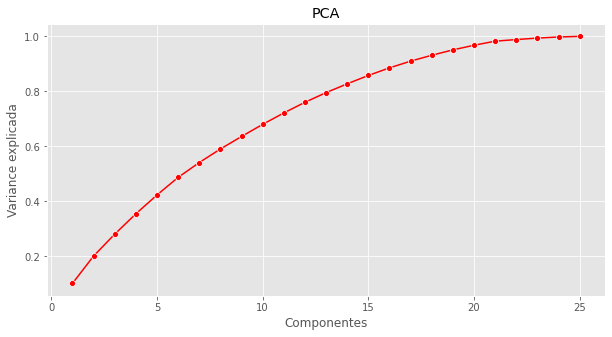

In [ ]:
# Gráfica de PCA con sus componentes versus el porcentaje de explicancia de la varianza. 
import seaborn as sns
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 26), pca.explained_variance_ratio_.cumsum(),marker='o',color='red')
plt.title('PCA')
plt.xlabel('Componentes')
plt.ylabel('Variance explicada')
plt.show()

In [ ]:
# Luego de esto se seleccionar 14 componentes principales.
pca = PCA(n_components=14)
pca.fit(df_binary)

PCA(copy=True, iterated_power='auto', n_components=14, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# Matriz de PCA
scores_pca = pca.transform(df_binary)

In [ ]:
# K means y pruebas para encontrar el valor de K óptimo con el método del codo. 
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
  kmeans_pca = KMeans(n_clusters=i, init = 'k-means++', random_state = 42)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


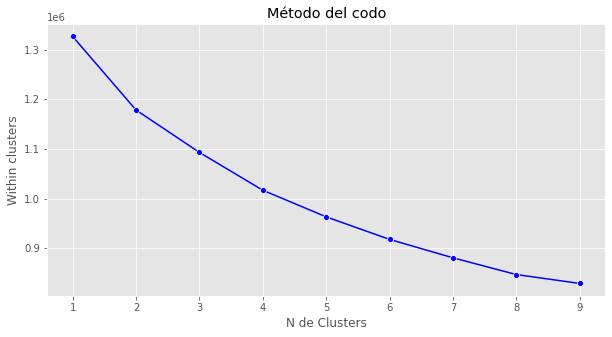

In [ ]:
# Gráfica metodo del codo. 
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 10), wcss ,marker='o',color='blue')
plt.title('Método del codo')
plt.xlabel('N de Clusters')
plt.ylabel('Within clusters')
plt.show();

## Algoritmo de k means con 4 clusters y 14 componentes principales.



In [ ]:
k_means_final = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
k_means_final.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
# Uniendo la base binaria con los predictores del k means. 
df_add = pd.concat([df_def.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
lista = [f'Component_{x}' for x in range(1,15)]

df_add.columns.values[-14: ] = lista
df_add['Clusters'] = k_means_final.labels_

In [ ]:
df_add

,GÉNERO,GSE,ZONA,TIPO_CONSTRUCCIÓN,EDAD_INT,Antigüedad_INT,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,Component_11,Component_12,Component_13,Component_14,Clusters
0,M,D,SANTIAGO CENTRO,HORIZONTAL,30 - 44,Más de 10 años,0.114859,0.545185,-0.418656,0.509600,0.211632,-0.392903,0.785310,0.275425,-0.600771,0.409770,-0.502832,-0.144396,-0.894980,-0.002418,2
1,M,C3,SANTIAGO CENTRO,HORIZONTAL,45 - 54,4 - 5 años,-0.838795,-0.033612,-0.056718,0.593413,-0.628119,-0.477383,-0.359887,-0.216218,-0.149256,-0.130445,-0.181244,-0.048987,-0.499555,0.526095,0
2,F,C3,SANTIAGO CENTRO,HORIZONTAL,18 - 29,2 - 3 años,-0.529346,0.466688,0.723509,0.208823,0.113378,-0.195619,-0.286608,-0.193690,-0.061701,-0.016415,-0.172302,-0.018115,-0.203556,1.202024,0
3,M,C2,SANTIAGO CENTRO,HORIZONTAL,30 - 44,5 - 10 años,0.906497,0.080522,-0.370598,0.246369,-0.543408,0.683038,0.016173,-0.116584,-0.206907,0.316087,-0.287589,-0.064797,-0.680564,0.416132,2
4,F,D,SANTIAGO CENTRO,HORIZONTAL,30 - 44,5 - 10 años,0.206397,0.672611,0.544498,-0.066207,-0.387483,0.619406,0.957105,0.259040,-0.487628,0.291556,-0.280275,-0.080102,-0.597456,0.270421,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497749,M,C2,ZONA CENTRO,HORIZONTAL,45 - 54,Menos de 3 meses,0.133431,-0.904461,-0.502455,-0.247996,-0.366222,-0.409456,-0.336693,0.629073,0.138073,-0.509880,0.104563,-0.061715,-0.178740,0.115116,1
497750,F,C2,ZONA CENTRO,HORIZONTAL,45 - 54,Menos de 3 meses,0.133301,-0.830176,0.330452,-0.760498,-0.204407,-0.398350,-0.299450,0.610507,0.187659,-0.447423,0.090425,-0.070355,-0.219143,0.091233,1
497751,M,C2,ZONA CENTRO,HORIZONTAL,30 - 44,Menos de 3 meses,0.853634,0.131289,-0.720427,-0.274477,0.072510,-0.065735,-0.326186,0.695232,0.134878,-0.353763,0.036455,-0.089718,-0.265269,0.068800,2
497752,F,C2,ZONA CENTRO,HORIZONTAL,65 o más,Menos de 3 meses,0.393017,-0.533645,0.304399,-0.491946,0.544380,-0.050056,-0.331176,0.931053,0.301406,0.301847,0.131498,0.099354,0.277079,0.369808,3


## Visualizando la primera y segunda componente.

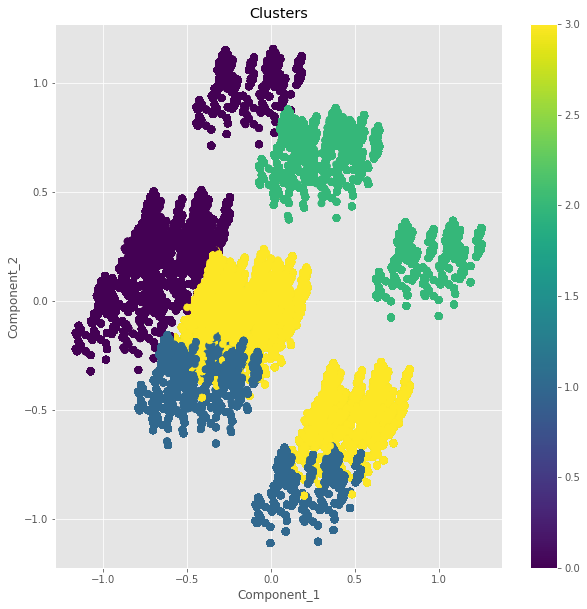

In [ ]:
#Plot the clusters obtained using k means


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(df_add['Component_1'], df_add['Component_2'],
                     c=df_add['Clusters'],s=50)
ax.set_title('Clusters')
ax.set_xlabel('Component_1')
ax.set_ylabel('Component_2')
plt.colorbar(scatter)

## Visualizando la primera, segunda componente y tercera componente. 

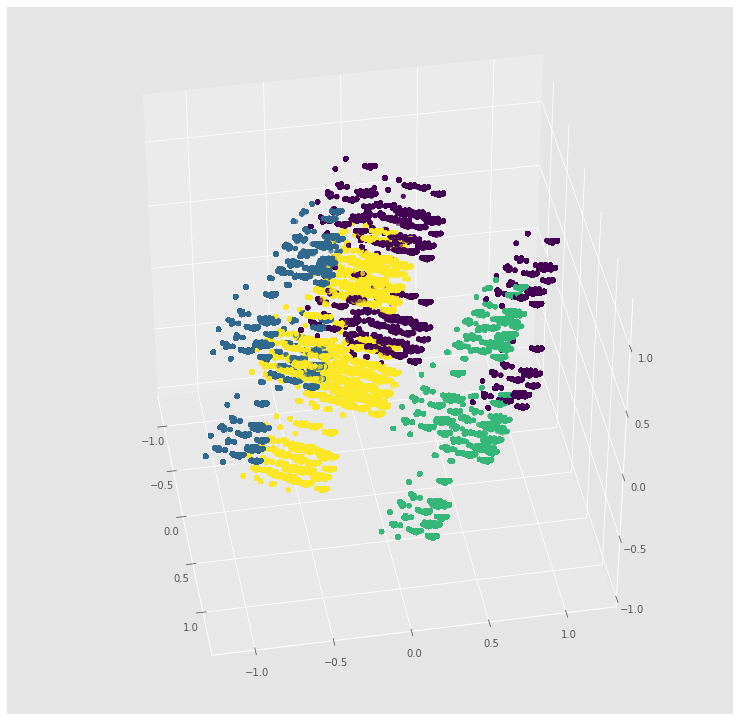

<Figure size 432x432 with 0 Axes>

In [ ]:
#%matplotlib noteboo

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(13,13))

ax = fig.add_subplot(111, projection='3d')



fig = plt.figure(figsize=(6,6))

# ax = fig.add_subplot(111, projection='3d') # Method 2
ax.azim = -10
ax.dist = 10
ax.elev = 40

ax.scatter(xs = df_add['Component_1'], ys = df_add['Component_2'], zs = df_add['Component_3'], c=df_add['Clusters'])
plt.show()

In [ ]:
df_add['Clusters'].value_counts()

3    145086
2    131824
0    125630
1     95214
Name: Clusters, dtype: int64

In [ ]:
df_add[df_add['Clusters'] == 3]['GSE'].value_counts() #/ df_add[df_add['GSE'] == 'C3' ]

C2      75338
ABC1    41497
D       25261
E        2990
Name: GSE, dtype: int64

## Analizando Resultados

Veamos que podemos sacar de los clusters.


## Cluster 1

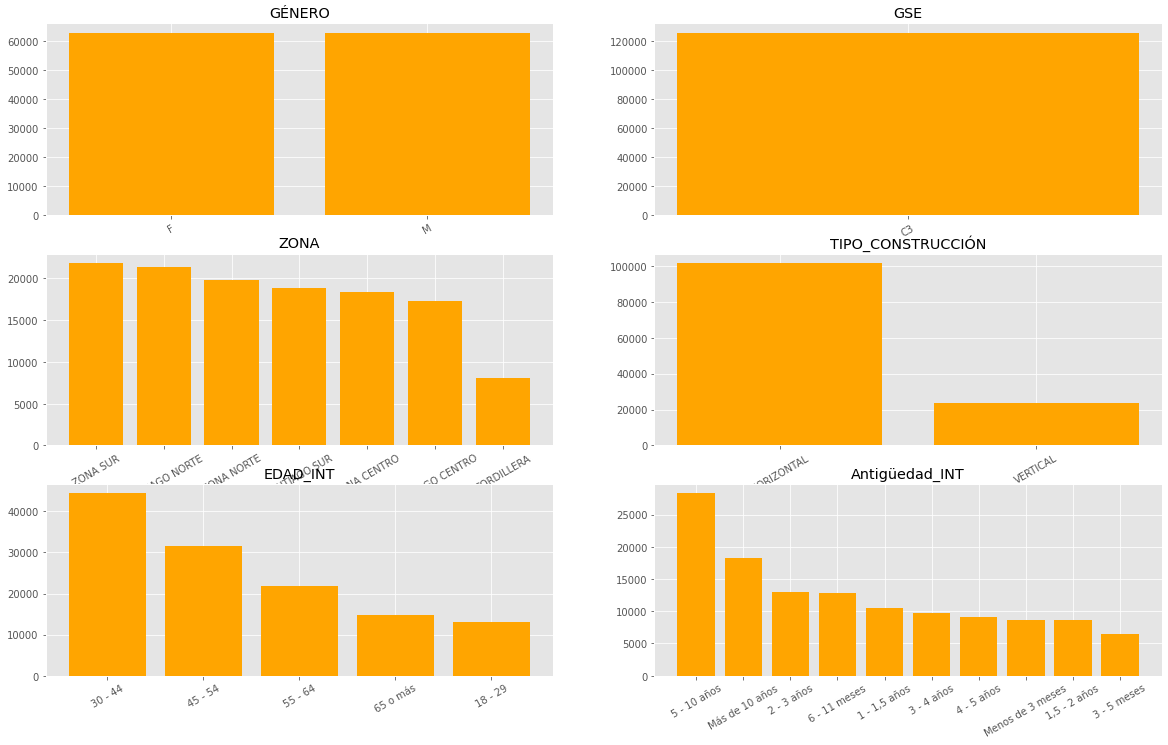

In [ ]:
plt.style.use('ggplot')
figure, axis=plt.subplots(3,2,figsize=(20,12))
# x = [x for x in range(0,len(df.columns))]
for i, ax in zip(df_analisis.columns, axis.flatten()):
  
  ax.set_title(f'{i}')
  ax.bar(df_analisis[df_analisis['Clusters'] == 0][i].value_counts().index, height=df_analisis[df_analisis['Clusters'] == 0][i].value_counts().tolist(), color=['orange'])
  ax.tick_params(axis='x', labelrotation=30)

plt.show();

> Compuesto por hombres y mujeres, de todas las edades que viven en casa y que pertenecen solo al grupo económico C3. 

## Cluster 2

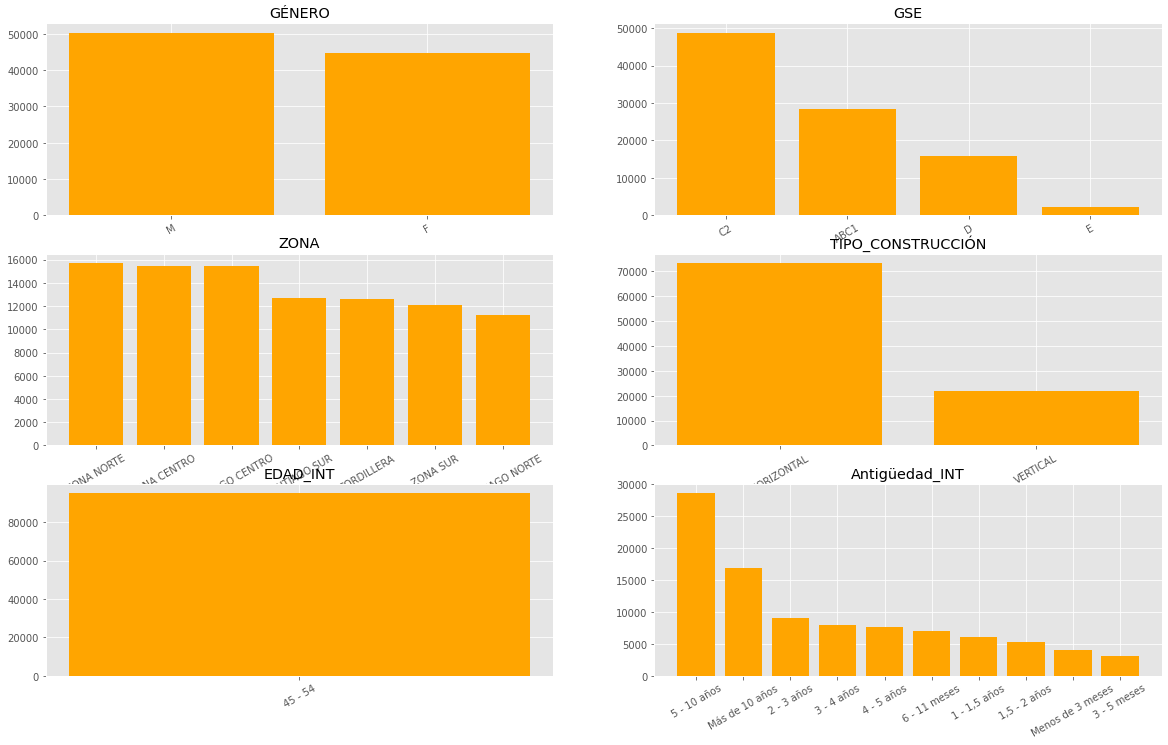

In [ ]:
plt.style.use('ggplot')
figure, axis=plt.subplots(3,2,figsize=(20,12))
# x = [x for x in range(0,len(df.columns))]
for i, ax in zip(df_analisis.columns, axis.flatten()):
  
  ax.set_title(f'{i}')
  ax.bar(df_analisis[df_analisis['Clusters'] == 1][i].value_counts().index, height=df_analisis[df_analisis['Clusters'] == 1][i].value_counts().tolist(), color=['orange'])
  ax.tick_params(axis='x', labelrotation=30)

plt.show();

> Compuesto por hombres y mujeres de edad entre 45 y 54 años, es decir, personas bastante mayores y que viven mayoritariamente en casa, pero que en su gran mayoría pertenecen al segmento C2. ( ejecutivos de nivel medio, comerciantes, etc) 

## Cluster 3

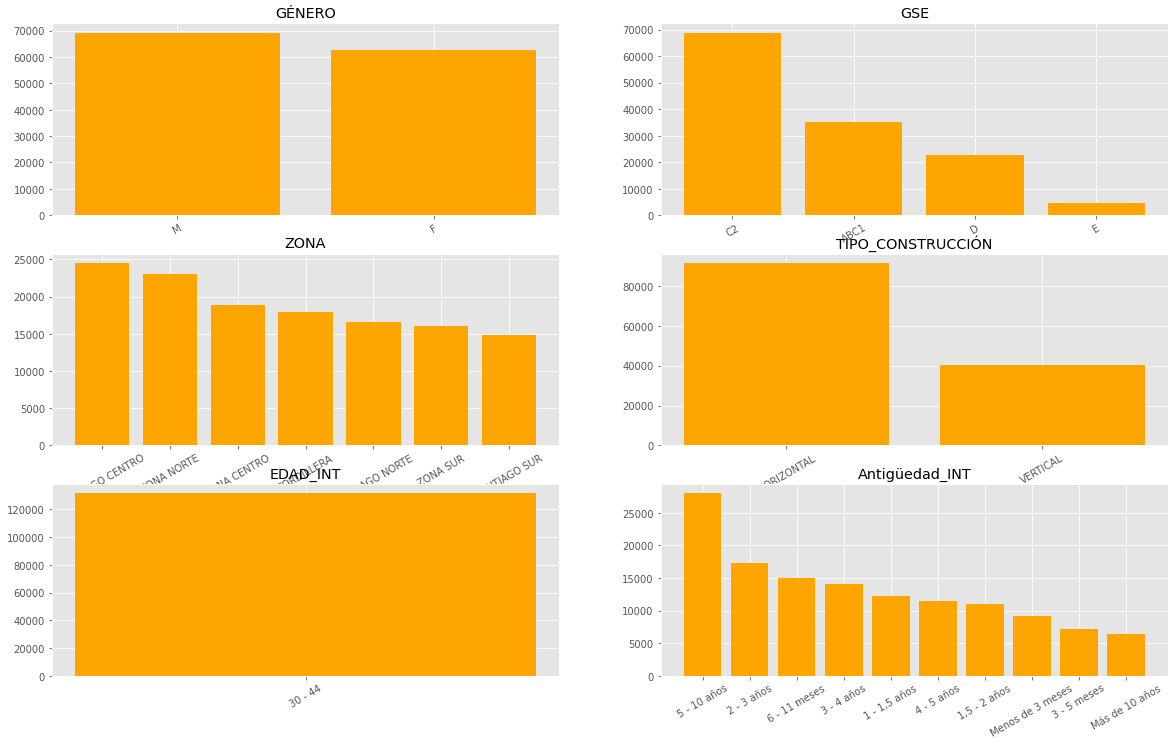

In [ ]:
plt.style.use('ggplot')
figure, axis=plt.subplots(3,2,figsize=(20,12))
# x = [x for x in range(0,len(df.columns))]
for i, ax in zip(df_analisis.columns, axis.flatten()):
  
  ax.set_title(f'{i}')
  ax.bar(df_analisis[df_analisis['Clusters'] == 2][i].value_counts().index, height=df_analisis[df_analisis['Clusters'] == 2][i].value_counts().tolist(), color=['orange'])
  ax.tick_params(axis='x', labelrotation=30)

plt.show();

> Hombres y mujeres que viven mayoritariamente en casa , pero que estan en el rango de 30 a 44 años. 

## Cluster 4

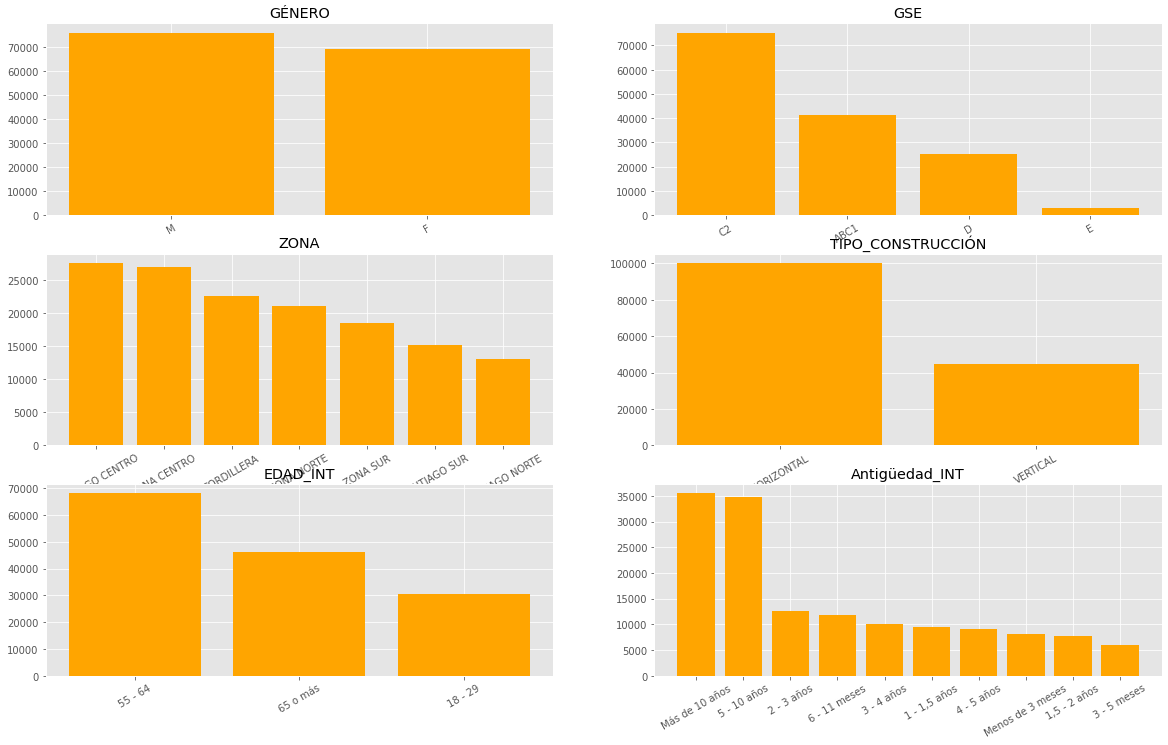

In [ ]:
plt.style.use('ggplot')
figure, axis=plt.subplots(3,2,figsize=(20,12))
# x = [x for x in range(0,len(df.columns))]
for i, ax in zip(df_analisis.columns, axis.flatten()):
  
  ax.set_title(f'{i}')
  ax.bar(df_analisis[df_analisis['Clusters'] == 3][i].value_counts().index, height=df_analisis[df_analisis['Clusters'] == 3][i].value_counts().tolist(), color=['orange'])
  ax.tick_params(axis='x', labelrotation=30)

plt.show();

> Este grupo es más complejo , pero son hombres y mujeres mayoritariamente de edad avanzada que viven en casas y que pertenecen a todos los grupos. 